In [1]:
# Donchian Channel
# upper bound is the highest value in last 20 days
# lower bound is the lowest value in last 20 days
# middle path is the mean of the above two
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ChinaUnicom=pd.read_csv('ChinaUnicom.csv')
ChinaUnicom.index=ChinaUnicom.iloc[:,1]
ChinaUnicom.index=pd.to_datetime(ChinaUnicom.index, format='%Y-%m-%d')
ChinaUnicom=ChinaUnicom.iloc[:,2:]
Close=ChinaUnicom.Close
High=ChinaUnicom.High
Low=ChinaUnicom.Low

In [3]:
# compute those indexes
upboundDC=pd.Series(0.0,index=Close.index)
downboundDC=pd.Series(0.0,index=Close.index)
midboundDC=pd.Series(0.0,index=Close.index)
for i in range(20,len(Close)):
    upboundDC[i]=max(High[(i-20):i])
    downboundDC[i]=min(Low[(i-20):i])
    midboundDC[i]=0.5*(upboundDC[i]+downboundDC[i])
upboundDC=upboundDC[20:]
downboundDC=downboundDC[20:]
midboundDC= midboundDC[20:]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


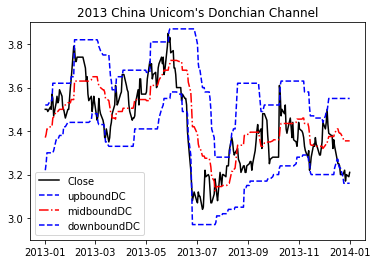

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close['2013'],label="Close",color='k')
plt.plot(upboundDC['2013'],label="upboundDC",color='b',linestyle='dashed')
plt.plot(midboundDC['2013'],label="midboundDC",color='r',linestyle='-.')
plt.plot(downboundDC['2013'],label="downboundDC",color='b',linestyle='dashed')
plt.title("2013 China Unicom's Donchian Channel")
plt.ylim(2.9,3.9)
plt.legend()
# rare breakouts in this case

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


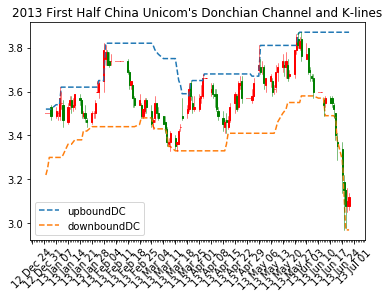

1

In [5]:
upDownDC=pd.DataFrame({'upboundDC':upboundDC,\
                      'downboundDC':downboundDC})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC13=upDownDC['2013-01-01':'2013-06-28']
import candle
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='2013 First Half China Unicom\'s Donchian Channel and K-lines',\
        Data=upDownDC13)

In [6]:
# define break functions
def upbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

def downbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]<tsRefLine[i],tsLine[i-1]>tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

In [7]:
# DC Strategy
UpBreak=upbreak(Close[upboundDC.index[0]:],upboundDC)
DownBreak=downbreak(Close[downboundDC.index[0]:],\
          downboundDC)
BreakSig=UpBreak-DownBreak

tradeSig=BreakSig.shift(1)
ret=Close/Close.shift(1)-1
tradeRet=(ret*tradeSig).dropna()
tradeRet[tradeRet==0]=0
winRate=len(tradeRet[tradeRet>0]\
            )/len(tradeRet[tradeRet!=0])
winRate
# the choice of time window is very important

0.45614035087719296

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


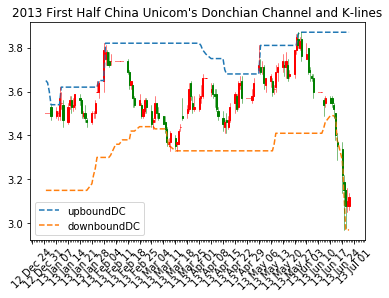

0.5

In [8]:
# another time window
# 40-day DC
upboundDC2=pd.Series(0.0,index=Close.index)
downboundDC2=pd.Series(0.0,index=Close.index)
midboundDC2=pd.Series(0.0,index=Close.index)

for i in range(40,len(Close)):
    upboundDC2[i]=max(High[(i-40):i])
    downboundDC2[i]=min(Low[(i-40):i])
    midboundDC2[i]=0.5*(upboundDC2[i]+downboundDC2[i])

upboundDC2=upboundDC2[40:]
downboundDC2=downboundDC2[40:]
midboundDC2= midboundDC2[40:]

upDownDC2=pd.DataFrame({'upboundDC':upboundDC2,\
                      'downboundDC':downboundDC2})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC2=upDownDC2['2013-01-01':'2013-06-28']

import candle
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='2013 First Half China Unicom\'s Donchian Channel and K-lines',\
        Data=upDownDC2)


UpBreak2=upbreak(Close[upboundDC2.index[0]:],upboundDC2)
DownBreak2=downbreak(Close[downboundDC2.index[0]:],downboundDC2)
BreakSig2=UpBreak2-DownBreak2
tradeSig2=BreakSig2.shift(1)
tradeRet2=(ret*tradeSig2).dropna()
tradeRet2[tradeRet2==0]=0
winRate2=len(tradeRet2[tradeRet2>0]\
         )/len(tradeRet2[tradeRet2!=0])
winRate2
# accuracy is higher

In [9]:
# Bollinger Bands (BBands)
# computation involves std and means
# like a confidence interval
def bbands(tsPrice,period=20,times=2):
    upBBand=pd.Series(0.0,index=tsPrice.index)
    midBBand=pd.Series(0.0,index=tsPrice.index)
    downBBand=pd.Series(0.0,index=tsPrice.index)
    sigma=pd.Series(0.0,index=tsPrice.index)
    for i in range(period-1,len(tsPrice)):
        midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
        sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
        upBBand[i]=midBBand[i]+times*sigma[i]
        downBBand[i]=midBBand[i]-times*sigma[i]
    BBands=pd.DataFrame({'upBBand':upBBand[(period-1):],\
                         'midBBand':midBBand[(period-1):],\
                         'downBBand':downBBand[(period-1):],\
                         'sigma':sigma[(period-1):]})
    return(BBands)

In [10]:
UnicomBBands=bbands(Close,20,2)
UnicomBBands.head()

,upBBand,midBBand,downBBand,sigma
Date,,,,
2010-01-29,7.797957,7.2775,6.757043,0.260228
2010-02-01,7.826073,7.2575,6.688927,0.284286
2010-02-02,7.840863,7.2215,6.602137,0.309682
2010-02-03,7.849999,7.1975,6.545001,0.326250
2010-02-04,7.870401,7.1790,6.487599,0.345701


In [11]:
upDownBB=UnicomBBands[['downBBand','upBBand']]
upDownBB13=upDownBB['2013-01-01':'2013-06-28']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


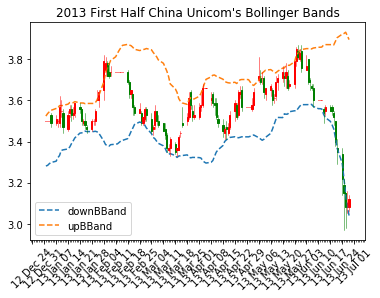

1

In [12]:
import candle
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='2013 First Half China Unicom\'s Bollinger Bands',\
        Data=upDownBB13)
# filtrate some fake signals

In [13]:
# Bollinger Risk
# different significant level corresponding to different intervals
def CalBollRisk(tsPrice,multiplier):
    k=len(multiplier)
    overUp=[]
    belowDown=[]
    BollRisk=[]
    for i in range(k):
        BBands=bbands(tsPrice,20,multiplier[i])
        a=0
        b=0
        for j in range(len(BBands)):
            tsPrice=tsPrice[-(len(BBands)):]
            if tsPrice[j]>BBands.upBBand[j]:
                a+=1
            elif tsPrice[j]<BBands.downBBand[j]:
                b+=1
        overUp.append(a)
        belowDown.append(b)
        BollRisk.append(100*(a+b)/len(tsPrice))
    return(BollRisk)

In [14]:
multiplier=[1,1.65,1.96,2,2.58]
price2010=Close['2010-01-04':'2010-12-31']
CalBollRisk(price2010,multiplier)

[51.98237885462555,
 22.596153846153847,
 12.698412698412698,
 11.764705882352942,
 3.9735099337748343]

In [15]:
price2011=Close['2011-01-04':'2011-12-31']
CalBollRisk(price2011,multiplier)

[53.57142857142857,
 22.4390243902439,
 9.67741935483871,
 9.580838323353293,
 3.3783783783783785]

In [16]:
price2012=Close['2012-01-04':'2012-12-31']
CalBollRisk(price2012,multiplier)

[57.5,
 30.316742081447963,
 16.831683168316832,
 16.39344262295082,
 1.829268292682927]

In [17]:
price2013=Close['2013-01-04':'2013-12-31']
CalBollRisk(price2013,multiplier)

[53.78151260504202,
 20.091324200913242,
 10.5,
 9.94475138121547,
 1.8518518518518519]

In [19]:
# up break means abnormal up so we short vice versa
# strategy
BBands=bbands(Close,20,2)

upbreakBB1=upbreak(Close,BBands.upBBand)
downbreakBB1=downbreak(Close,BBands.downBBand)
# trade after 2 days of signal
upBBSig1=-upbreakBB1.shift(2)
downBBSig1=downbreakBB1.shift(2)

tradSignal1=upBBSig1+downBBSig1
tradSignal1[tradSignal1==-0]=0

In [20]:
# evaluate function
def perform(tsPrice,tsTradSig):
    ret=tsPrice/tsPrice.shift(1)-1
    tradRet=(ret*tsTradSig).dropna()
    ret=ret[-len(tradRet):]
    winRate=[len(ret[ret>0])/len(ret[ret!=0]),\
             len(tradRet[tradRet>0])/len(tradRet[tradRet!=0])]
    meanWin=[np.mean(ret[ret>0]),\
             np.mean(tradRet[tradRet>0])]
    meanLoss=[np.mean(ret[ret<0]),\
             np.mean(tradRet[tradRet<0])]
    Performance=pd.DataFrame({'winRate':winRate,'meanWin':meanWin,\
                             'meanLoss':meanLoss})
    Performance.index=['Stock','Trade']
    return(Performance)

In [21]:
Performance1= perform(Close,tradSignal1)
Performance1

,winRate,meanWin,meanLoss
Stock,0.458525,0.013320,-0.012599
Trade,0.557692,0.014709,-0.011710


In [22]:
# another strategy
upbreakBB2=upbreak(Close,BBands.downBBand)
downbreakBB2=downbreak(Close,BBands.upBBand)

In [23]:
upBBSig2=upbreakBB2.shift(2)
downBBSig2=-downbreakBB2.shift(2)
tradSignal2=upBBSig2+downBBSig2
tradSignal2[tradSignal2==-0]=0

In [24]:
# performance
Performance2= perform(Close,tradSignal2)
Performance2
# we can change the time window

,winRate,meanWin,meanLoss
Stock,0.458525,0.013320,-0.012599
Trade,0.529412,0.014584,-0.010517
